## Importing libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import scipy.stats as stats
from matplotlib.pyplot import figure
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from matplotlib import pyplot
from sklearn.feature_selection import mutual_info_classif

## Reading the Data

In [ ]:
dataset= pd.read_excel(r"C:\Users\hmeli\OneDrive\Masaüstü\DataGlacierDataSets\Project\Healthcaredata.xlsx")
df=dataset.copy()
print("Data imported successfully!")

Data imported successfully!


## Properties of the Dataset

In [ ]:
df.head()

,Ptid,Persistency_Flag,Gender,Race,Ethnicity,Region,Age_Bucket,Ntm_Speciality,Ntm_Specialist_Flag,Ntm_Speciality_Bucket,...,Risk_Family_History_Of_Osteoporosis,Risk_Low_Calcium_Intake,Risk_Vitamin_D_Insufficiency,Risk_Poor_Health_Frailty,Risk_Excessive_Thinness,Risk_Hysterectomy_Oophorectomy,Risk_Estrogen_Deficiency,Risk_Immobilization,Risk_Recurring_Falls,Count_Of_Risks
0,P1,Persistent,Male,Caucasian,Not Hispanic,West,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,0
1,P2,Non-Persistent,Male,Asian,Not Hispanic,West,55-65,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,0
2,P3,Non-Persistent,Female,Other/Unknown,Hispanic,Midwest,65-75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,Y,N,N,N,N,N,N,N,2
3,P4,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,1
4,P5,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,1


In [ ]:
df.tail()

,Ptid,Persistency_Flag,Gender,Race,Ethnicity,Region,Age_Bucket,Ntm_Speciality,Ntm_Specialist_Flag,Ntm_Speciality_Bucket,...,Risk_Family_History_Of_Osteoporosis,Risk_Low_Calcium_Intake,Risk_Vitamin_D_Insufficiency,Risk_Poor_Health_Frailty,Risk_Excessive_Thinness,Risk_Hysterectomy_Oophorectomy,Risk_Estrogen_Deficiency,Risk_Immobilization,Risk_Recurring_Falls,Count_Of_Risks
3419,P3420,Persistent,Female,Caucasian,Not Hispanic,South,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,Y,N,N,N,N,N,N,1
3420,P3421,Persistent,Female,Caucasian,Not Hispanic,South,>75,Unknown,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,0
3421,P3422,Persistent,Female,Caucasian,Not Hispanic,South,>75,ENDOCRINOLOGY,Specialist,Endo/Onc/Uro,...,N,N,Y,N,N,N,N,N,N,1
3422,P3423,Non-Persistent,Female,Caucasian,Not Hispanic,South,55-65,Unknown,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,0
3423,P3424,Non-Persistent,Female,Caucasian,Not Hispanic,South,65-75,Unknown,Others,OB/GYN/Others/PCP/Unknown,...,N,N,Y,N,N,N,N,N,N,1


## Dataset information

In [ ]:
#overall dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3424 entries, 0 to 3423
Data columns (total 69 columns):
 #   Column                                                              Non-Null Count  Dtype 
---  ------                                                              --------------  ----- 
 0   Ptid                                                                3424 non-null   object
 1   Persistency_Flag                                                    3424 non-null   object
 2   Gender                                                              3424 non-null   object
 3   Race                                                                3424 non-null   object
 4   Ethnicity                                                           3424 non-null   object
 5   Region                                                              3424 non-null   object
 6   Age_Bucket                                                          3424 non-null   object
 7   Ntm_Speciality          

In [ ]:
df.dtypes

Ptid                              object
Persistency_Flag                  object
Gender                            object
Race                              object
Ethnicity                         object
                                   ...  
Risk_Hysterectomy_Oophorectomy    object
Risk_Estrogen_Deficiency          object
Risk_Immobilization               object
Risk_Recurring_Falls              object
Count_Of_Risks                     int64
Length: 69, dtype: object

In [ ]:
#We have 3424 observations and 69 features.
df.shape

(3424, 69)

## Checking whether the dataset has any null values

In [ ]:
df.isnull().values.any()

False

In [ ]:
df.isnull().sum()

Ptid                              0
Persistency_Flag                  0
Gender                            0
Race                              0
Ethnicity                         0
                                 ..
Risk_Hysterectomy_Oophorectomy    0
Risk_Estrogen_Deficiency          0
Risk_Immobilization               0
Risk_Recurring_Falls              0
Count_Of_Risks                    0
Length: 69, dtype: int64

## Reading the Cleaned Data

In [ ]:
# Reading the data 

df0 = pd.read_csv("Healthcare_cleaned_dataset.csv")
df0.head()

,Ptid,Persistency_Flag,Gender,Race,Ethnicity,Region,Age_Bucket,Ntm_Speciality,Ntm_Specialist_Flag,Ntm_Speciality_Bucket,...,Risk_Family_History_Of_Osteoporosis,Risk_Low_Calcium_Intake,Risk_Vitamin_D_Insufficiency,Risk_Poor_Health_Frailty,Risk_Excessive_Thinness,Risk_Hysterectomy_Oophorectomy,Risk_Estrogen_Deficiency,Risk_Immobilization,Risk_Recurring_Falls,Count_Of_Risks
0,P1,Persistent,Male,Caucasian,Not Hispanic,West,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,0
1,P2,Non-Persistent,Male,Asian,Not Hispanic,West,55-65,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,0
2,P3,Non-Persistent,Female,Other/Unknown,Hispanic,Midwest,65-75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,Y,N,N,N,N,N,N,N,2
3,P4,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,1
4,P5,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,1


# Feature Engineering

## Transforming Categorical Data : 

In this step, we are going, first, to convert features regarding to the numbers of categories (two categories or multiple categories).Then, we are going to convert Y/N values to 1/0.

In [ ]:
#Converting categorical variables that contains two categories using Label Encoding
two_categ = ['Persistency_Flag','Gender','Ntm_Specialist_Flag','Risk_Segment_Prior_Ntm','Adherent_Flag', 'Tscore_Bucket_Prior_Ntm','Gluco_Record_Prior_Ntm','Gluco_Record_During_Rx','Dexa_During_Rx','Frag_Frac_During_Rx','Adherent_Flag','Idn_Indicator','Injectable_Experience_During_Rx','Frag_Frac_Prior_Ntm']

labenco = LabelEncoder()
for val in two_categ:
    df0[val] = labenco.fit_transform(df0[val])

In [ ]:
#Coverting categorical variables with multiple categories using Label Encoding
multiple_categ = ['Age_Bucket','Ntm_Speciality','Ntm_Speciality_Bucket','Race','Ethnicity','Region']
for column in multiple_categ:
    df0[column] = df0[column].astype('category')
    df0[column] = labenco.fit_transform(df0[column])

Now, as seen in the table, the rest of non encoding columns categorical are Y and N values. So, we are going to replace all o them by 1 and 0 respectively, without encode each column alone.

In [ ]:
#Convert Y/N values to 1/0
df0.replace(('Y', 'N'), (1,0), inplace = True)
df0

,Ptid,Persistency_Flag,Gender,Race,Ethnicity,Region,Age_Bucket,Ntm_Speciality,Ntm_Specialist_Flag,Ntm_Speciality_Bucket,...,Risk_Family_History_Of_Osteoporosis,Risk_Low_Calcium_Intake,Risk_Vitamin_D_Insufficiency,Risk_Poor_Health_Frailty,Risk_Excessive_Thinness,Risk_Hysterectomy_Oophorectomy,Risk_Estrogen_Deficiency,Risk_Immobilization,Risk_Recurring_Falls,Count_Of_Risks
0,P1,1,1,2,1,4,3,5,0,1,...,0,0,0,0,0,0,0,0,0,0
1,P2,0,1,1,1,4,0,5,0,1,...,0,0,0,0,0,0,0,0,0,0
2,P3,0,0,3,0,0,1,5,0,1,...,0,1,0,0,0,0,0,0,0,2
3,P4,0,0,2,1,0,3,5,0,1,...,0,0,0,0,0,0,0,0,0,1
4,P5,0,0,2,1,0,3,5,0,1,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3419,P3420,1,0,2,1,3,3,5,0,1,...,0,0,1,0,0,0,0,0,0,1
3420,P3421,1,0,2,1,3,3,34,0,1,...,0,0,0,0,0,0,0,0,0,0
3421,P3422,1,0,2,1,3,3,3,1,0,...,0,0,1,0,0,0,0,0,0,1
3422,P3423,0,0,2,1,3,0,34,0,1,...,0,0,0,0,0,0,0,0,0,0


Now, let's check for data types after data tranformation step.

In [ ]:
df0.dtypes

Ptid                              object
Persistency_Flag                   int32
Gender                             int32
Race                               int32
Ethnicity                          int32
                                   ...  
Risk_Hysterectomy_Oophorectomy     int64
Risk_Estrogen_Deficiency           int64
Risk_Immobilization                int64
Risk_Recurring_Falls               int64
Count_Of_Risks                     int64
Length: 65, dtype: object

In [ ]:
df.to_csv("Healthcare_cleaned_and tranformed_dataset.csv", index = False)

## Machine Learning Model Deployment

In [ ]:
X= df0.drop(["Persistency_Flag"], axis=1)
y= df0["Persistency_Flag"]

## Seperating the dataset into train and test set

In [ ]:
#importing the necessary library
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.20, random_state=42)

In [ ]:
print("X_train shape: {}".format(X_train.shape))
print("y_train shape: {}".format(y_train.shape))

X_train shape: (2739, 64)
y_train shape: (2739,)


In [ ]:
print("X_test shape: {}".format(X_test.shape))
print("y_test shape: {}".format(y_test.shape))

X_test shape: (685, 64)
y_test shape: (685,)


## Logistic Regression

In [ ]:
#Encoding the dataset
from sklearn import preprocessing

In [ ]:
labenco.fit(y_train)
labenco.fit(y_test)

LabelEncoder()

In [ ]:
y_train_enc=labenco.fit_transform(y_train)
y_test_enc=labenco.fit_transform(y_test)

In [ ]:
oe= preprocessing.OrdinalEncoder()

In [ ]:
oe.fit(X_train)
oe.fit(X_test)

OrdinalEncoder()

In [ ]:
X_train_enc=oe.fit_transform(X_train)
X_test_enc=oe.fit_transform(X_test)

## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report 
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
loj= LogisticRegression(solver="liblinear")
loj_model= loj.fit(X_train_enc, y_train_enc)

In [ ]:
loj_model.intercept_

array([-2.80785966])

In [ ]:
loj_model.coef_

array([[-1.64567393e-04,  2.28201983e-01, -2.03283562e-01,
         4.09774643e-02,  1.15014484e-01,  8.49656687e-02,
         1.01179904e-02,  2.76051560e-01, -4.01272130e-01,
        -4.87380759e-01,  2.02410288e-01,  2.83551473e-01,
         2.42743547e-01, -5.41739177e-01,  3.78689897e-01,
         2.54152929e-01, -2.41497931e-01,  3.43570607e-01,
         4.63513281e-01,  1.46194070e-01,  6.31719969e-01,
         3.98673152e-01,  6.11190510e-01,  8.28441916e-01,
         3.05005235e-01,  1.66826472e-01,  1.01074012e+00,
         3.19389523e-01,  2.44369050e-01,  7.26438011e-01,
         2.18266050e-02, -3.23104082e-01,  1.63275864e-01,
         2.95808734e-01, -1.94014849e-01, -3.21291761e-01,
         4.14140793e-01,  3.33121507e-02,  4.03517463e-01,
         7.46661298e-02,  2.45543111e-01,  5.95109268e-01,
         2.60504191e-01,  8.42152840e-01, -6.67696483e-01,
         8.73413382e-02,  2.95737450e-01, -6.23195902e-02,
         6.66262286e-01,  4.16919252e-02,  4.20198518e-0

In [ ]:
y_pred= loj_model.predict(X_test_enc)

In [ ]:
#computing the accuracy score
accuracy_score(y_test_enc, y_pred)

0.8014598540145985

In [ ]:
print(classification_report(y_test_enc, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.86      0.85       431
           1       0.75      0.70      0.72       254

    accuracy                           0.80       685
   macro avg       0.79      0.78      0.78       685
weighted avg       0.80      0.80      0.80       685



In [ ]:
cross_val_score(loj_model, X_test_enc, y_test_enc, cv=10)

array([0.76811594, 0.76811594, 0.72463768, 0.73913043, 0.7826087 ,
       0.80882353, 0.77941176, 0.82352941, 0.79411765, 0.85294118])

In [ ]:
cross_val_score(loj_model, X_test_enc, y_test_enc, cv=10).mean()

0.7841432225063938

## KNN Models

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn=KNeighborsClassifier()
knn_model=knn.fit(X_train_enc, y_train_enc)
knn_model

KNeighborsClassifier()

In [ ]:
y_pred=knn_model.predict(X_test_enc)

In [ ]:
accuracy_score(y_test_enc, y_pred)

0.6452554744525547

## Model Tuning for KNN

In [ ]:
knn_params={"n_neighbors": np.arange(1,20)}

In [ ]:
knn=KNeighborsClassifier()
knn_cv=GridSearchCV(knn, knn_params, cv=10)

In [ ]:
knn_cv.fit(X_train_enc, y_train_enc)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])})

In [ ]:
knn_cv.best_params_

{'n_neighbors': 2}

In [ ]:
knn=KNeighborsClassifier(3)

In [ ]:
knn_tuned=knn.fit(X_train_enc, y_train_enc)

In [ ]:
y_pred=knn_tuned.predict(X_test_enc)

In [ ]:
accuracy_score(y_test_enc, y_pred)

0.6496350364963503

In [ ]:
print(classification_report(y_test_enc, y_pred))

              precision    recall  f1-score   support

           0       0.71      0.75      0.73       431
           1       0.53      0.47      0.50       254

    accuracy                           0.65       685
   macro avg       0.62      0.61      0.62       685
weighted avg       0.64      0.65      0.64       685



## Support Vector Machine

In [ ]:
from sklearn import svm

In [ ]:
svc_model=svm.SVC().fit(X_train_enc, y_train_enc)

In [ ]:
y_pred=svc_model.predict(X_test_enc)

In [ ]:
accuracy_score(y_test_enc, y_pred)

0.6291970802919709

## Model Tuning for SVM

In [ ]:
svc=svm.SVC()

In [ ]:
svc_params={"C": np.arange(1,10)}

In [ ]:
svc_cv_model=GridSearchCV(svc, svc_params, cv=10, n_jobs=-1, verbose=2)

In [ ]:
svc_cv_model.fit(X_train_enc, y_train_enc)

Fitting 10 folds for each of 9 candidates, totalling 90 fits


GridSearchCV(cv=10, estimator=SVC(), n_jobs=-1,
             param_grid={'C': array([1, 2, 3, 4, 5, 6, 7, 8, 9])}, verbose=2)

In [ ]:
svc_cv_model.best_params_

{'C': 1}

In [ ]:
svc_tuned=svm.SVC(1).fit(X_train_enc, y_train_enc)

C:\Users\hmeli\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass C=1 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


In [ ]:
y_pred=svc_tuned.predict(X_test_enc)

In [ ]:
accuracy_score(y_test_enc, y_pred)

0.6291970802919709

In [ ]:
print(classification_report(y_test_enc, y_pred))

              precision    recall  f1-score   support

           0       0.63      1.00      0.77       431
           1       0.00      0.00      0.00       254

    accuracy                           0.63       685
   macro avg       0.31      0.50      0.39       685
weighted avg       0.40      0.63      0.49       685



C:\Users\hmeli\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hmeli\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hmeli\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Neural Network

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier

In [ ]:
scaler=StandardScaler()

In [ ]:
scaler.fit(X_train_enc)

StandardScaler()

In [ ]:
X_train_scaled=scaler.transform(X_train_enc)

In [ ]:
X_test_scaled=scaler.transform(X_test_enc)

In [ ]:
mlpc=MLPClassifier().fit(X_train_scaled, y_train_enc)

C:\Users\hmeli\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
y_pred=mlpc.predict(X_test_scaled)

In [ ]:
accuracy_score(y_test_enc, y_pred)

0.7547445255474453

In [ ]:
print(classification_report(y_test_enc, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.80      0.80       431
           1       0.66      0.69      0.67       254

    accuracy                           0.75       685
   macro avg       0.74      0.74      0.74       685
weighted avg       0.76      0.75      0.76       685



## Classification Trees

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
cart=DecisionTreeClassifier()

In [ ]:
cart_model=cart.fit(X_train_enc, y_train_enc)

In [ ]:
y_pred=cart_model.predict(X_test_enc)

In [ ]:
accuracy_score(y_test_enc, y_pred)

0.6948905109489051

In [ ]:
print(classification_report(y_test_enc, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.74      0.75       431
           1       0.58      0.62      0.60       254

    accuracy                           0.69       685
   macro avg       0.68      0.68      0.68       685
weighted avg       0.70      0.69      0.70       685



## Model Tuning for Cart

In [ ]:
cart_params={"max_depth": list(range(1,10)),
            "min_samples_split": list(range(2,50))}

In [ ]:
cart_cv=GridSearchCV(cart, cart_params, cv=10, n_jobs=-1, verbose=2)

In [ ]:
cart_cv.fit(X_train_enc, y_train_enc)

Fitting 10 folds for each of 432 candidates, totalling 4320 fits


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                               12, 13, 14, 15, 16, 17, 18, 19,
                                               20, 21, 22, 23, 24, 25, 26, 27,
                                               28, 29, 30, 31, ...]},
             verbose=2)

In [ ]:
cart_cv.best_params_

{'max_depth': 4, 'min_samples_split': 3}

In [ ]:
cart_tuned=DecisionTreeClassifier(max_depth= 4, min_samples_split=3)

In [ ]:
cart_tuned.fit(X_train_enc, y_train_enc)

DecisionTreeClassifier(max_depth=4, min_samples_split=3)

In [ ]:
y_pred=cart_tuned.predict(X_test_enc)

In [ ]:
accuracy_score(y_test_enc, y_pred)

0.7708029197080292

In [ ]:
print(classification_report(y_test_enc, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.86      0.82       431
           1       0.72      0.62      0.67       254

    accuracy                           0.77       685
   macro avg       0.76      0.74      0.75       685
weighted avg       0.77      0.77      0.77       685



## Random Forest Model

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf_model=RandomForestClassifier().fit(X_train_enc, y_train_enc)
rf_model

RandomForestClassifier()

In [ ]:
y_pred=rf_model.predict(X_test_enc)

In [ ]:
accuracy_score(y_test_enc, y_pred)

0.7927007299270074

In [ ]:
print(classification_report(y_test_enc, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.87      0.84       431
           1       0.75      0.66      0.70       254

    accuracy                           0.79       685
   macro avg       0.78      0.77      0.77       685
weighted avg       0.79      0.79      0.79       685



## Gradient Boosting Model

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
gbm=GradientBoostingClassifier()
gbm_model=gbm.fit(X_train_enc, y_train_enc)

In [ ]:
y_pred=gbm_model.predict(X_test_enc)

In [ ]:
accuracy_score(y_test_enc, y_pred)

0.8029197080291971

In [ ]:
print(classification_report(y_test_enc, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.86      0.85       431
           1       0.75      0.71      0.73       254

    accuracy                           0.80       685
   macro avg       0.79      0.78      0.79       685
weighted avg       0.80      0.80      0.80       685



## Choosing the best model

In [ ]:
models=[knn_tuned, loj_model, mlpc, gbm_model, rf_model, cart_tuned, svc_tuned]

In [ ]:
for model in models:
    names=model.__class__.__name__
    y_pred=model.predict(X_test_enc)
    accuracy=accuracy_score(y_test_enc, y_pred)
    result=pd.DataFrame([[names, accuracy*100]], columns=["models", "accuracy"])
    results=results.append(result)

C:\Users\hmeli\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Comparison of Models')

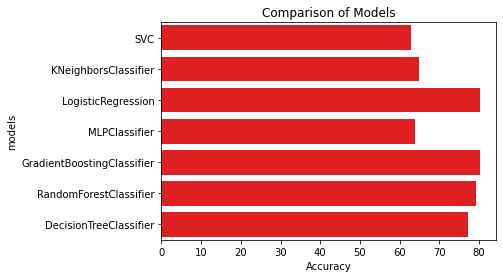

In [ ]:
sns.barplot("accuracy", "models", data=results, color="r")
plt.xlabel("Accuracy")
plt.title("Comparison of Models")

## Ploting a ROC Curve

## Models

In [ ]:
y_score1 = loj_model.predict(X_test_enc)
y_score2 = rf_model.predict(X_test_enc)
y_score3 = gbm_model.predict(X_test_enc)
y_score4 = svc_tuned.predict(X_test_enc)
y_score5 = mlpc.predict(X_test_scaled)
y_score6 = cart_tuned.predict(X_test_enc)
y_score7 = knn_tuned.predict(X_test_enc)

## Creating False and True Positive Rates and printing Scores

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

In [ ]:
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test, y_score1)
false_positive_rate2, true_positive_rate2, threshold2 = roc_curve(y_test, y_score2)
false_positive_rate3, true_positive_rate3, threshold3 = roc_curve(y_test, y_score3)
false_positive_rate4, true_positive_rate4, threshold4 = roc_curve(y_test, y_score4)
false_positive_rate5, true_positive_rate5, threshold5 = roc_curve(y_test, y_score5)
false_positive_rate6, true_positive_rate6, threshold6 = roc_curve(y_test, y_score6)
false_positive_rate7, true_positive_rate7, threshold7 = roc_curve(y_test, y_score7)

In [ ]:
print('roc_auc_score for Logistic Regression: ', roc_auc_score(y_test, y_score1))
print('roc_auc_score for Random Forest: ', roc_auc_score(y_test, y_score2))
print('roc_auc_score for GBM: ', roc_auc_score(y_test, y_score3))
print('roc_auc_score for SVC: ', roc_auc_score(y_test, y_score4))
print('roc_auc_score for Neural Network: ', roc_auc_score(y_test, y_score5))
print('roc_auc_score for Cart: ', roc_auc_score(y_test, y_score6))
print('roc_auc_score for KNN: ', roc_auc_score(y_test, y_score7))

roc_auc_score for Logistic Regression:  0.7799797212123427
roc_auc_score for Random Forest:  0.7657434642015457
roc_auc_score for GBM:  0.7835650474085171
roc_auc_score for SVC:  0.5
roc_auc_score for Neural Network:  0.7404315179860058
roc_auc_score for Cart:  0.7402579607943438
roc_auc_score for KNN:  0.6132506348539379


## Ploting ROC Curves

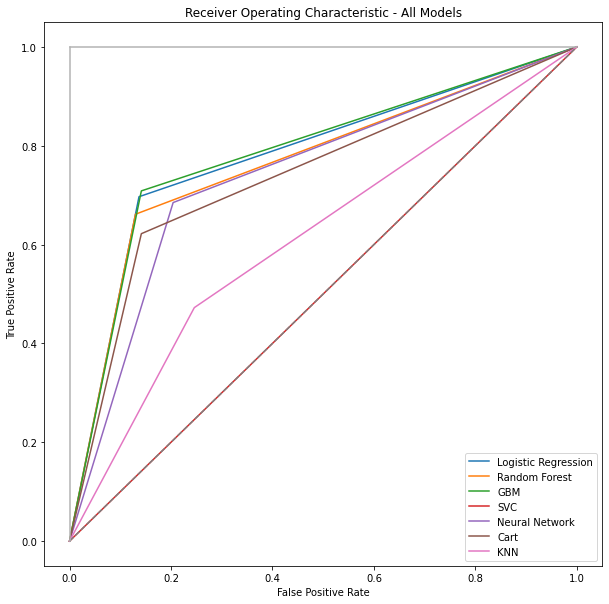

In [ ]:
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - All Models')
plt.plot(false_positive_rate1, true_positive_rate1, label = "Logistic Regression")
plt.plot(false_positive_rate2, true_positive_rate2, label = "Random Forest")
plt.plot(false_positive_rate3, true_positive_rate3, label = "GBM")
plt.plot(false_positive_rate4, true_positive_rate4, label = "SVC")
plt.plot(false_positive_rate5, true_positive_rate5, label = "Neural Network")
plt.plot(false_positive_rate6, true_positive_rate6, label = "Cart")
plt.plot(false_positive_rate7, true_positive_rate7, label = "KNN")


plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
plt.show()

## Conclusion: 

We have prepare the dataset for the classification problem. We set X by dropping the target variable "Persistency_Flag" and we set y as the target variable. Then we have used "Ordinal" and "Label" Encoder to encode the variables.

As usual, we split the dataset as train set and test set.
We have applied Logistic Regression, KNN, Random Forest Model, Neural Network, Gradient Boosting Model, Support Vector Machines and Classification Trees Models.

As seen in the above, we have compared their accuracy scores and we obtained the following:

Gradient Boosting Model is the best fit model to our dataset with accuracy score 0.80. 

We can apply Logistic Regression model with accuracy score 0.80 and cross validated score with 10 splits 0.78 and we can also apply Random Forest Model with accuracy score 0.79 . 